# Map and Categorize variables for
# Matched DMV Crash and Hospital data (MV104/SPARCS)
data provided by dohmh

This notebook checks that mapping script (databuild.py) is working and shows counts of all variable categories. Databuild.py maps the variable in the data from it's raw form to a more descriptive name taken from the data dictionary provided by DOHMH.

### Variables given - from crash data
date/time of crash
* date - date of crash

person injured
* f_per_age
* f_per_sex - male, female
* f_per_role (f_per_role_doh) - driver, passenger, pedestrian, bicyclist, motorcyclist (dohmh was able to extract motorcylists), unknown
* f_per_ejected - ejected, not ejected, unknown
* f_per_loc - at intersection, not at intersection, unknown (majority are unknown)

injury information
* f_inj_status_num - 1-6, unknown
* f_inj_status - conscious stated, not conscious states, death
* f_inj_type - 14 types, unknown
* f_inj_loc - 12 locations, unknown

road information
* f_road_light - 5 types, unknown
* f_road_surf_bi - dry, not dry unknown
* f_road_surf - dry, flooded, muddy, slush, snow/ice, wet, unknown (almost all dry)
* f_road_weather - clear, cloudy, rain, snow, sleet, fog, other, unknown
* f_road_control - none, traffic signal, stop sign, other, unknown

vehicle information
* f_act_veh - what the vehicle the person was in was doing - need to narrow donw
* f_veh - car, suburban, pickup, van, truck, pedestrian, bicyclist, unknown
* f_veh_doh - car/van/pickup, truck, taxi, bus, other(bike, motorcycle, ped)
* f_oveh_doh - same as above. but with two more unknown vars 6 and 7


In [1]:
import pandas as pd
pd.options.display.max_rows = 130
pd.options.display.max_columns = 130

import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

import databuild as db
import sys
sys.path.insert(0,'/home/deena/Documents/data_munge/ModaCode/')
import moda

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read in DMV data into 3 tables
crash,ind,veh = db.readDMV()
# pedestrians, bicyclists, single vehicle
ped = db.buildTablesDMV(crash,ind,veh)

#read in DMV-SPARCS linked data
linked = db.readLinked()

# included biss data from linked (dropping anything not in linked)
ped = db.mergeBiss(ped,linked)

#format and categorize variables
ped = db.formatVars(ped)

print 'pedestrians in linked crashes',ped.shape


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


full crash table (522108, 26)
full person table (1502797, 22)
full vehicle table (1092922, 20)


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (1,9,20,25,35,48,54,58,63,65,85,89,102,126,128,129,138) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


pedestrians/bicyclists (police reported) (single vehicle) (95292, 80)
linked (76763, 131)
linked after dropping no police reports (69657, 131)
pedestrians in linked crashes (17624, 106)


## variables
all mapped variables prefixed with f

### Person level info (either injured person or driver): 
#### injury type

In [3]:
ped.fillna('-').groupby(['f_InjuryType','INJT_ID']).count()[['CI_ID']]

,,CI_ID
f_InjuryType,INJT_ID,
Abrasion,11,1171
Amputation,1,27
Complaint of Pain,12,8983
Concusion,2,263
Contusion-Bruise,10,1421
Fracture-Dislocation,9,846
Internal,3,269
Minor Bleeding,4,1559
Minor Burn,6,57


#### injury emotional state

In [4]:
ped.fillna('-').groupby(['f_InjuryStatus','EMTNSTATT_CDE']).count()[['CI_ID']]

CI_ID
f_InjuryStatus       EMTNSTATT_CDE       
conscious states     5                480
                     6              15587
not conscious states 1                 68
                     2                285
                     3                410
                     4                172
unknown              -1               612
                     -2                 1
                     -3                 9

#### injury location

In [5]:
ped.fillna('-').groupby(['f_InjuryLoc','INJLOCT_CDE']).count()[['CI_ID']]

,,CI_ID
f_InjuryLoc,INJLOCT_CDE,
Abdomen-Pelvis,9,309
Back,6,1138
Chest,5,176
Elbow-Lower Arm-Hand,8,1464
Entire Body,12,2166
Eye,3,23
Face,2,504
Head,1,2662
Hip-Upper Leg,10,1663


#### person and driver sex

In [6]:
ped.fillna('_').groupby(['f_Sex','CI_SEX_CDE']).count()[['CI_ID']]

,,CI_ID
f_Sex,CI_SEX_CDE,
female,F,7736
male,M,9888


In [7]:
ped.fillna('_').groupby(['f_DriverSex','CI_SEX_CDE_driver']).count()[['CI_ID']]

CI_ID
f_DriverSex CI_SEX_CDE_driver       
female      F                   3423
            f                      1
male        M                  10656
            m                      4
unknown     U                     19
            unknown             3521

#### person and driver age

In [8]:
ped.groupby(['f_AgeYear','INDIV_AGE']).count()[['CI_ID']]

,,CI_ID
f_AgeYear,INDIV_AGE,
1.0,1.0,21
2.0,2.0,89
3.0,3.0,102
4.0,4.0,91
5.0,5.0,112
6.0,6.0,125
7.0,7.0,150
8.0,8.0,194
9.0,9.0,189


In [9]:
ped.groupby(['f_DriverAgeYear','INDIV_AGE_driver']).count()[['CI_ID']]

,,CI_ID
f_DriverAgeYear,INDIV_AGE_driver,
14.0,14.0,1
15.0,15.0,2
16.0,16.0,7
17.0,17.0,36
18.0,18.0,55
19.0,19.0,126
20.0,20.0,144
21.0,21.0,165
22.0,22.0,221


In [10]:
ped.groupby(['f_AgeDecade','INDIV_AGE']).count()[['CI_ID']]

CI_ID
f_AgeDecade INDIV_AGE       
0.0         1.0           21
            2.0           89
            3.0          102
            4.0           91
            5.0          112
            6.0          125
            7.0          150
            8.0          194
            9.0          189
10.0        10.0         249
            11.0         280
            12.0         355
            13.0         310
            14.0         318
            15.0         283
            16.0         318
            17.0         373
            18.0         364
            19.0         383
20.0        20.0         412
            21.0         409
            22.0         426
            23.0         444
            24.0         462
            25.0         449
            26.0         367
            27.0         360
            28.0         326
            29.0         341
30.0        30.0         333
            31.0         282
            32.0         261
            33.0         236
            34.0         252
            35.0         244
            36.0         244
            37.0         205
            38.0         210
            39.0         188
40.0        40.0         206
            41.0         205
            42.0         213
            43.0         206
            44.0         191
            45.0         226
            46.0         199
            47.0         220
            48.0         224
            49.0         246
50.0        50.0         221
            51.0         207
            52.0         236
            53.0         211
            54.0         224
            55.0         215
            56.0         215
            57.0         177
            58.0         211
            59.0         164
60.0        60.0         189
            61.0         163
            62.0         173
            63.0         146
            64.0         159
            65.0         136
            66.0         130
            67.0         119
            68.0         102
            69.0         109
70.0        70.0          96
            71.0          98
            72.0          87
            73.0          94
            74.0          80
            75.0          76
            76.0          84
            77.0          65
            78.0          66
            79.0          61
80.0        80.0          60
            81.0          44
            82.0          51
            83.0          36
            84.0          45
            85.0          40
            86.0          32
            87.0          22
            88.0          19
            89.0          24
90.0        90.0          13
            91.0          13
            92.0          10
            93.0           4
            94.0           2
            95.0           2

In [11]:
ped.groupby(['f_DriverAgeDecade','INDIV_AGE_driver']).count()[['CI_ID']]

CI_ID
f_DriverAgeDecade INDIV_AGE_driver       
10.0              14.0                  1
                  15.0                  2
                  16.0                  7
                  17.0                 36
                  18.0                 55
                  19.0                126
20.0              20.0                144
                  21.0                165
                  22.0                221
                  23.0                250
                  24.0                287
                  25.0                281
                  26.0                262
                  27.0                314
                  28.0                281
                  29.0                263
30.0              30.0                298
                  31.0                251
                  32.0                296
                  33.0                292
                  34.0                313
                  35.0                328
                  36.0                290
                  37.0                279
                  38.0                295
                  39.0                322
40.0              40.0                292
                  41.0                284
                  42.0                284
                  43.0                319
                  44.0                334
                  45.0                291
                  46.0                346
                  47.0                350
                  48.0                319
                  49.0                331
50.0              50.0                309
                  51.0                297
                  52.0                308
                  53.0                289
                  54.0                276
                  55.0                311
                  56.0                277
                  57.0                295
                  58.0                242
                  59.0                228
60.0              60.0                215
                  61.0                219
                  62.0                192
                  63.0                178
                  64.0                180
                  65.0                160
                  66.0                140
                  67.0                146
                  68.0                101
                  69.0                 87
70.0              70.0                 84
                  71.0                 72
                  72.0                 65
                  73.0                 61
                  74.0                 41
                  75.0                 57
                  76.0                 56
                  77.0                 47
                  78.0                 37
                  79.0                 39
80.0              80.0                 22
                  81.0                 26
                  82.0                 42
                  83.0                 31
                  84.0                 21
                  85.0                 17
                  86.0                 17
                  87.0                 10
                  88.0                 21
                  89.0                 12
90.0              90.0                  5
                  91.0                  5
                  92.0                  1
                  93.0                  2
                  94.0                  2
                  95.0                  1
unknown           unknown            3571

In [12]:
ped.groupby(['f_Age70','INDIV_AGE']).count()[['CI_ID']]

CI_ID
f_Age70   INDIV_AGE       
age < 70  1.0           21
          2.0           89
          3.0          102
          4.0           91
          5.0          112
          6.0          125
          7.0          150
          8.0          194
          9.0          189
          10.0         249
          11.0         280
          12.0         355
          13.0         310
          14.0         318
          15.0         283
          16.0         318
          17.0         373
          18.0         364
          19.0         383
          20.0         412
          21.0         409
          22.0         426
          23.0         444
          24.0         462
          25.0         449
          26.0         367
          27.0         360
          28.0         326
          29.0         341
          30.0         333
          31.0         282
          32.0         261
          33.0         236
          34.0         252
          35.0         244
          36.0         244
          37.0         205
          38.0         210
          39.0         188
          40.0         206
          41.0         205
          42.0         213
          43.0         206
          44.0         191
          45.0         226
          46.0         199
          47.0         220
          48.0         224
          49.0         246
          50.0         221
          51.0         207
          52.0         236
          53.0         211
          54.0         224
          55.0         215
          56.0         215
          57.0         177
          58.0         211
          59.0         164
          60.0         189
          61.0         163
          62.0         173
          63.0         146
          64.0         159
          65.0         136
          66.0         130
          67.0         119
          68.0         102
          69.0         109
age >= 70 70.0          96
          71.0          98
          72.0          87
          73.0          94
          74.0          80
          75.0          76
          76.0          84
          77.0          65
          78.0          66
          79.0          61
          80.0          60
          81.0          44
          82.0          51
          83.0          36
          84.0          45
          85.0          40
          86.0          32
          87.0          22
          88.0          19
          89.0          24
          90.0          13
          91.0          13
          92.0          10
          93.0           4
          94.0           2
          95.0           2

In [13]:
ped.groupby(['f_DriverAge70','INDIV_AGE_driver']).count()[['CI_ID']]

CI_ID
f_DriverAge70 INDIV_AGE_driver       
age < 70      14.0                  1
              15.0                  2
              16.0                  7
              17.0                 36
              18.0                 55
              19.0                126
              20.0                144
              21.0                165
              22.0                221
              23.0                250
              24.0                287
              25.0                281
              26.0                262
              27.0                314
              28.0                281
              29.0                263
              30.0                298
              31.0                251
              32.0                296
              33.0                292
              34.0                313
              35.0                328
              36.0                290
              37.0                279
              38.0                295
              39.0                322
              40.0                292
              41.0                284
              42.0                284
              43.0                319
              44.0                334
              45.0                291
              46.0                346
              47.0                350
              48.0                319
              49.0                331
              50.0                309
              51.0                297
              52.0                308
              53.0                289
              54.0                276
              55.0                311
              56.0                277
              57.0                295
              58.0                242
              59.0                228
              60.0                215
              61.0                219
              62.0                192
              63.0                178
              64.0                180
              65.0                160
              66.0                140
              67.0                146
              68.0                101
              69.0                 87
age >= 70     70.0                 84
              71.0                 72
              72.0                 65
              73.0                 61
              74.0                 41
              75.0                 57
              76.0                 56
              77.0                 47
              78.0                 37
              79.0                 39
              80.0                 22
              81.0                 26
              82.0                 42
              83.0                 31
              84.0                 21
              85.0                 17
              86.0                 17
              87.0                 10
              88.0                 21
              89.0                 12
              90.0                  5
              91.0                  5
              92.0                  1
              93.0                  2
              94.0                  2
              95.0                  1
unknown       unknown            3571

#### role

In [14]:
ped.groupby(['f_Role','CIROLET_ID']).count()[['CI_ID']]

CI_ID
f_Role     CIROLET_ID       
bicyclist  14             13
           7            3478
pedestrian 6           14133

#### occupant ejected

In [15]:
ped.fillna('-').groupby(['EJCTT_ID','f_Eject']).count()[['CI_ID']]

,,CI_ID
EJCTT_ID,f_Eject,
-1,unknown,1269
-2,unknown,14131
-3,unknown,5
1,not ejected,1157
2,ejected,153
3,ejected,909


#### pedestrian at intersection or not

In [16]:
ped.fillna('-').groupby(['f_PedLoc','PBLOCT_ID']).count()[['CI_ID']]

CI_ID
f_PedLoc            PBLOCT_ID       
at intersection     1           3767
not at intersection 2           1321
unknown             -1           416
                    unknown    12120

### Crash variables
#### light conditions

In [17]:
ped.fillna('-').groupby(['f_Lighting','LGHTCNDT_ID']).count()[['CI_ID']]

CI_ID
f_Lighting LGHTCNDT_ID       
Dark-Road  4             5696
           5              119
Dawn/Dusk  2              372
           3              779
Daylight   1            10481
unknown    -1             177

#### road surface

In [18]:
ped.fillna('-').groupby(['f_RoadSurface','RDSRFT_ID']).count()[['CI_ID']]

CI_ID
f_RoadSurface RDSRFT_ID       
Dry           1          13963
Not Dry       2           3218
              3              6
              4            181
              5             69
              6              9
unknown       -1           171
              7              7

#### weather

In [19]:
ped.fillna('-').groupby(['f_Weather','WTHRT_ID']).count()[['CI_ID']]

CI_ID
f_Weather     WTHRT_ID       
Clear         1         12716
Cloudy        2          2026
              6            33
Percipitation 3          2373
              4           203
              5            69
unknown       -1          198
              9             6

#### traffic control

In [20]:
ped.fillna('-').groupby(['f_TrafficControl','TFCCTRLT_ID']).count()[['CI_ID']]

CI_ID
f_TrafficControl TFCCTRLT_ID       
None             1             5939
Other            11              10
                 12              23
                 13               2
                 14               3
                 15              53
                 4               31
                 5               11
                 6               33
                 7                6
                 8                6
                 9                1
Stop sign        3             1151
Traffic signal   2             9813
unknown          -1             505
                 -2              12
                 18               9
                 19              16

#### time of day

In [21]:
ped.groupby(['f_TimeOfDay','HR1']).count()[['CI_ID']]

CI_ID
f_TimeOfDay HR1           
0.0         0          275
            1          207
            2          179
1.0         3          139
            4          161
            5          199
2.0         6          386
            7          563
            8          925
3.0         10         685
            11         693
            9          740
4.0         12         763
            13         807
            14        1040
5.0         15        1144
            16        1244
            17        1420
6.0         18        1459
            19        1322
            20        1115
7.0         21         944
            22         672
            23         496
unknown     unknown     46

#### pedestrian pre-accident action

In [22]:
ped.fillna('-').groupby(['f_PedAction','PBACTT_DMV_CDE']).count()[['CI_ID']]

CI_ID
f_PedAction                           PBACTT_DMV_CDE       
Along Highway                         5                1198
                                      6                 364
Crossing, Against Signal              2                2247
Crossing, No Signal or Crosswalk      4                2743
Crossing, No Signal, Marked Crosswalk 3                1286
Crossing, With Signal                 1                5698
Other                                 10                  9
                                      11                140
                                      12                171
                                      13                797
                                      14                373
                                      7                 607
                                      8                  13
                                      9                 134
unknown                               -1               1844

### vehicle info
#### vehicle pre-accident action

In [23]:
ped.fillna('-').groupby(['f_OtherVehAction','PACCACTT_ID_other']).count()[['CI_ID']]

CI_ID
f_OtherVehAction     PACCACTT_ID_other       
Backing              15                  1078
Going Straight Ahead 1                   8191
Making Left Turn     17                    35
                     3                   4760
                     4                    144
Making Right Turn    16                    11
                     2                   1615
Other                11                     9
                     12                    51
                     13                    51
                     14                    30
                     18                     4
                     20                   204
Stopping Starting    10                    29
                     5                    218
                     6                    112
                     7                    203
                     8                     75
                     9                    184
unknown              -1                   574
                     -2                     2
                     -3                     1
                     unknown               43

In [24]:
ped.fillna('-').groupby(['f_OtherVehType','VEHBDYT_ID_other']).count()[['CI_ID']]

CI_ID
f_OtherVehType VEHBDYT_ID_other       
Bus            60.0                332
Car            1.0                  77
               3.0                  60
               4.0                 233
               6.0                6026
               7.0                 396
               16.0                111
               63.0                850
Motorcycle     10.0                 96
Pickup         44.0                243
Suburban       5.0                5286
Truck          2.0                   8
               15.0                 93
               22.0                 17
               40.0                 29
               41.0                 51
               42.0                 39
               43.0                 12
               45.0                  4
               47.0                 21
               48.0                 22
               50.0                 26
               57.0                  1
               65.0                  2
Van            49.0                636
unknown        8.0                   1
               13.0                  1
               17.0               2895
               19.0                  1
               23.0                  1
               26.0                  1
               38.0                  1
               61.0                  6
               66.0                  3
               unknown              43

## bar graph for all variables

In [25]:
ped.shape

(17624, 106)

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


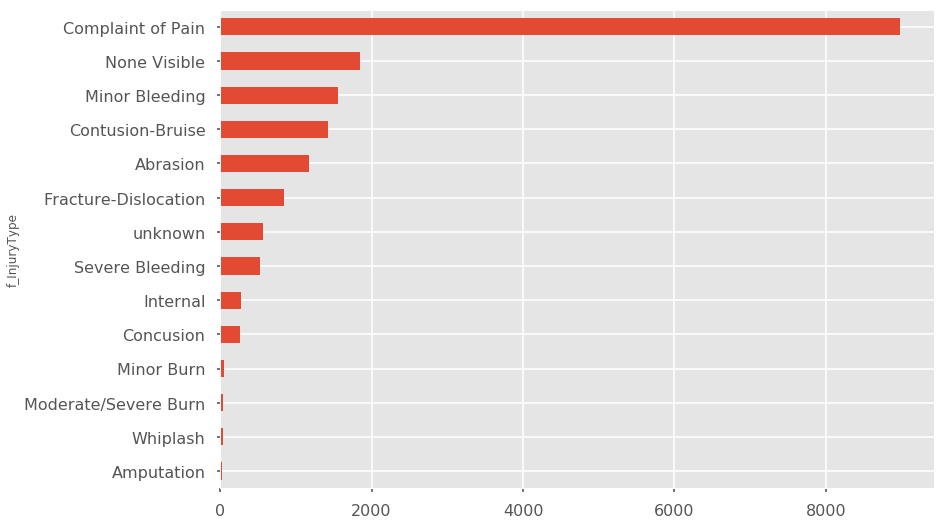

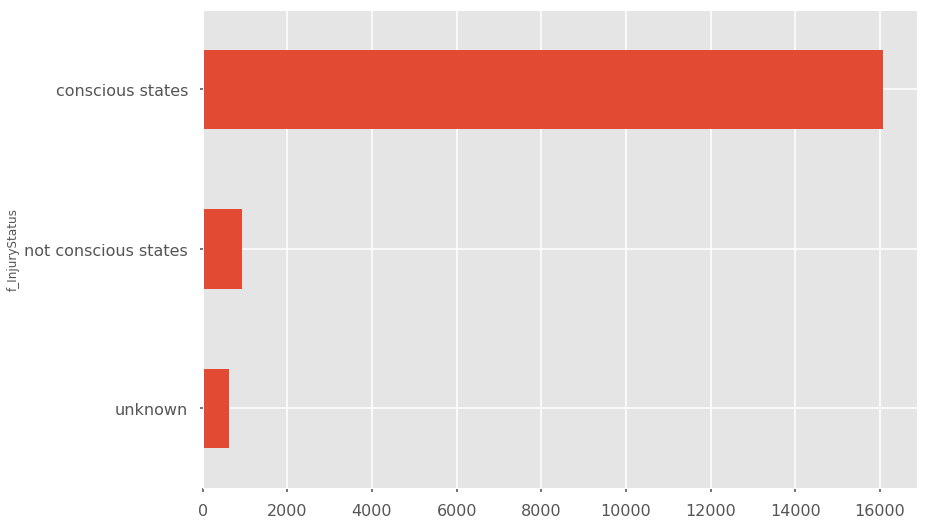

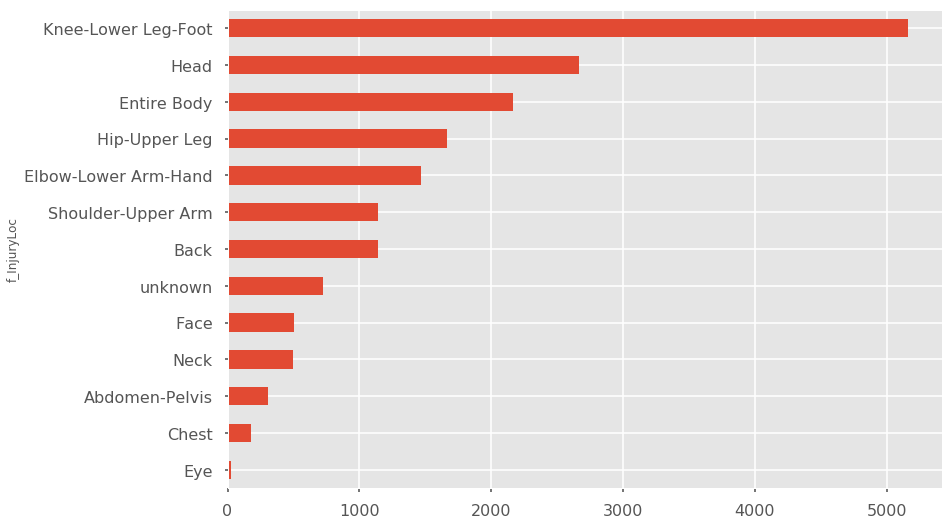

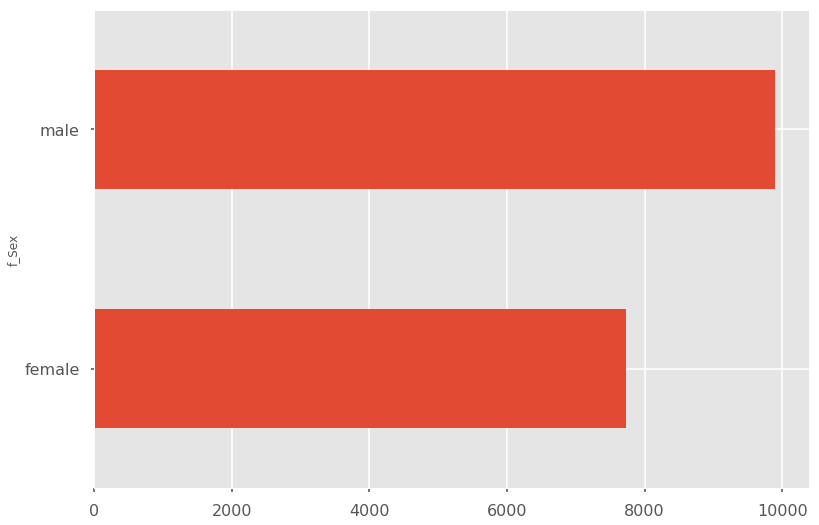

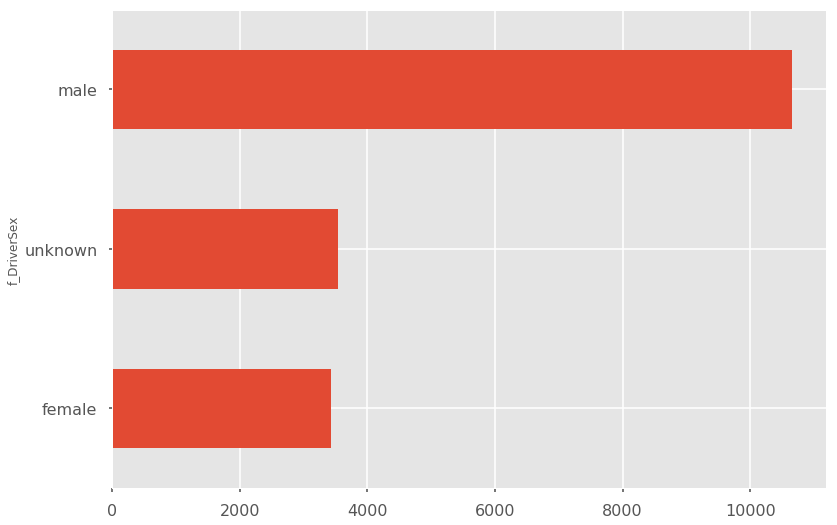

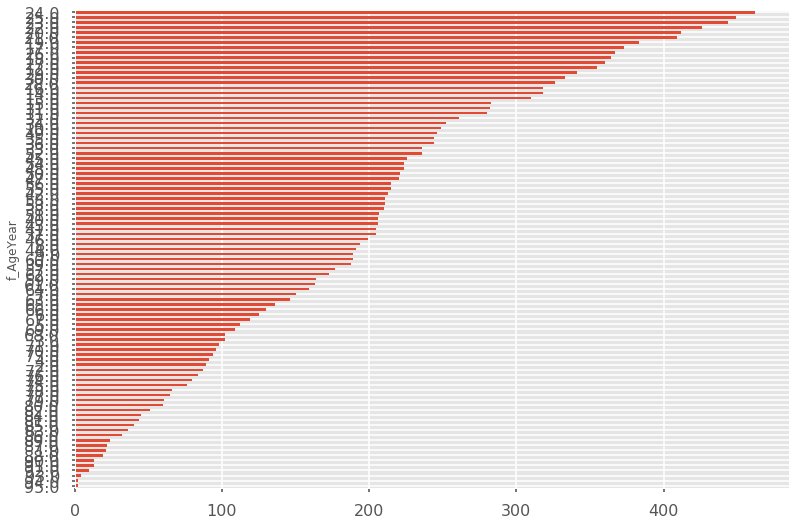

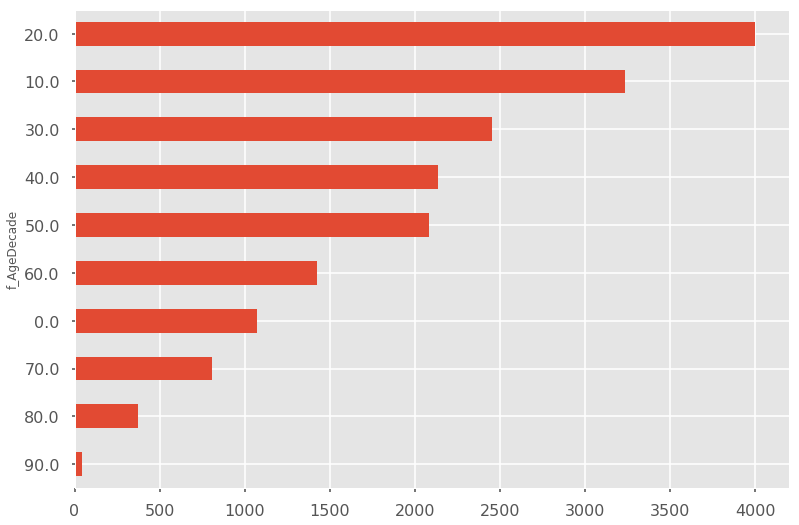

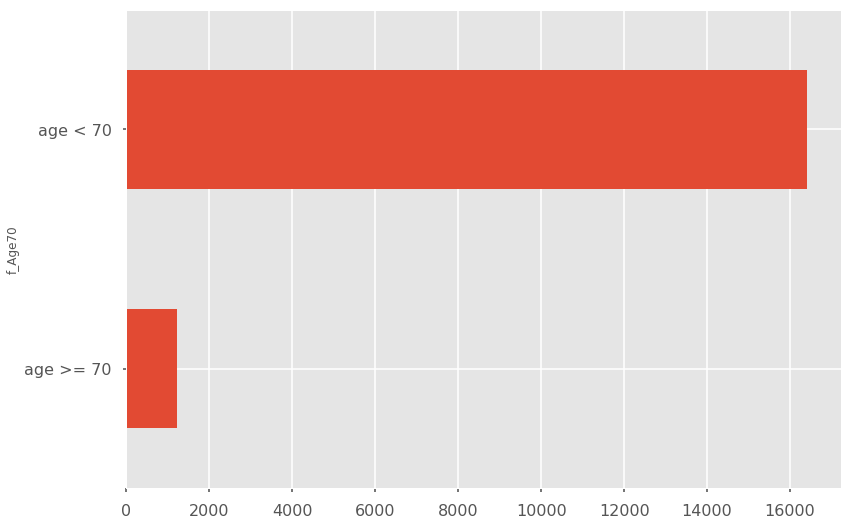

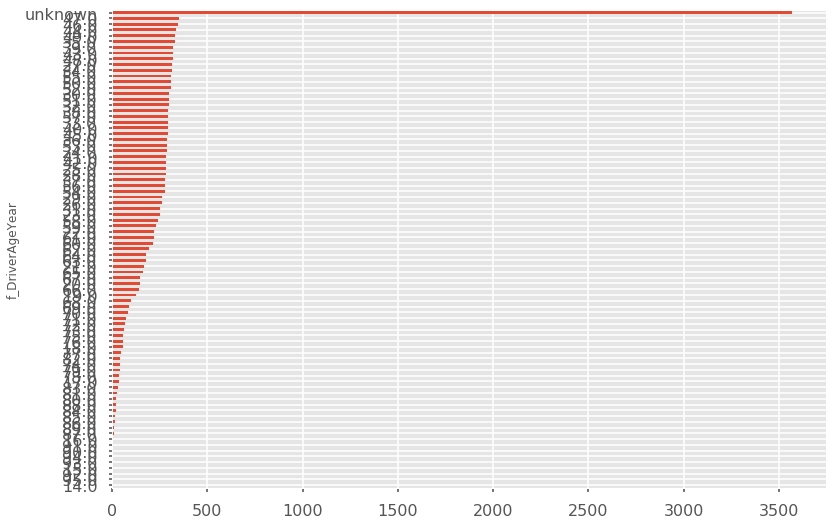

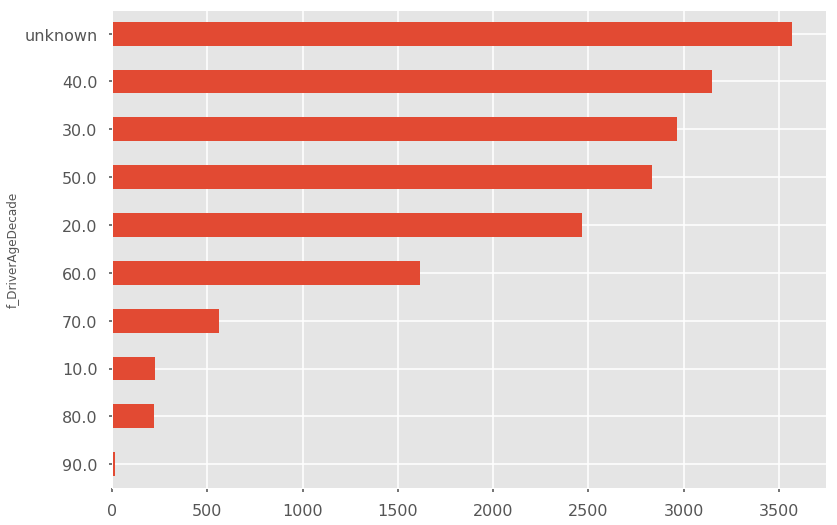

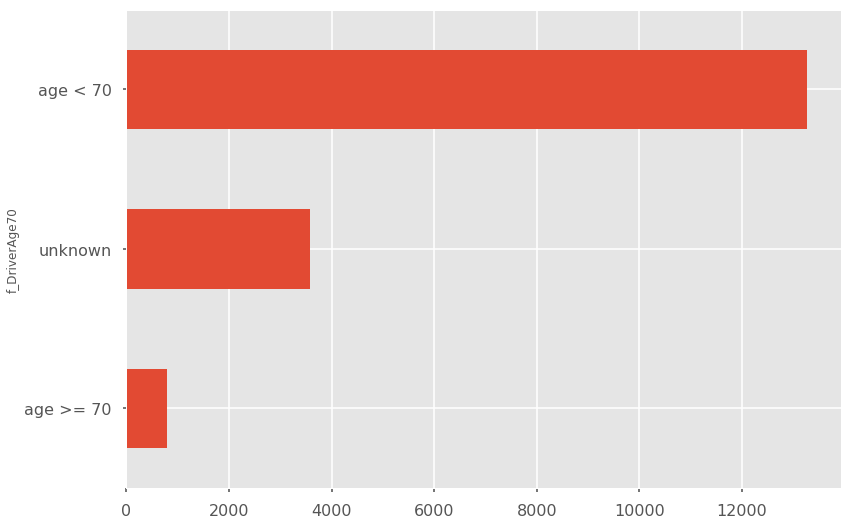

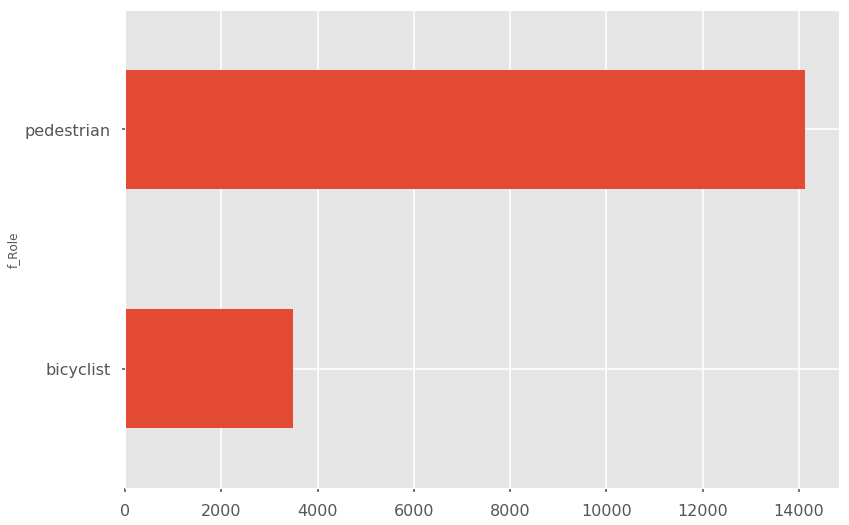

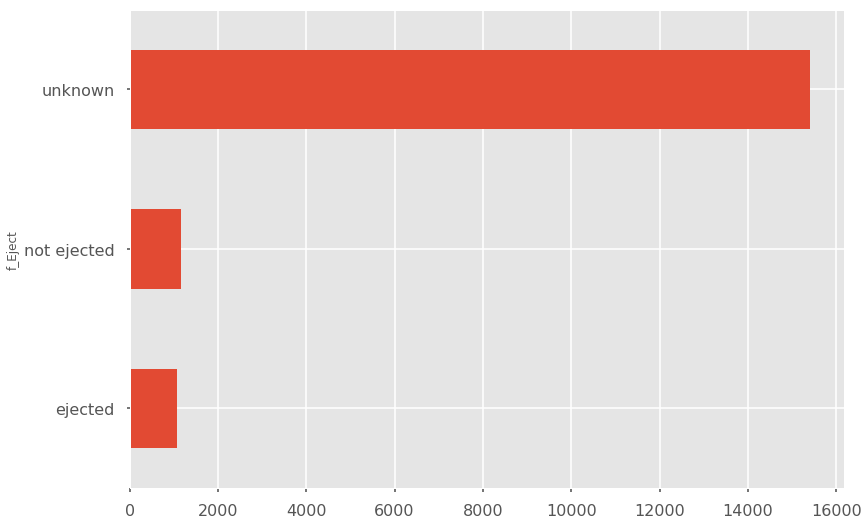

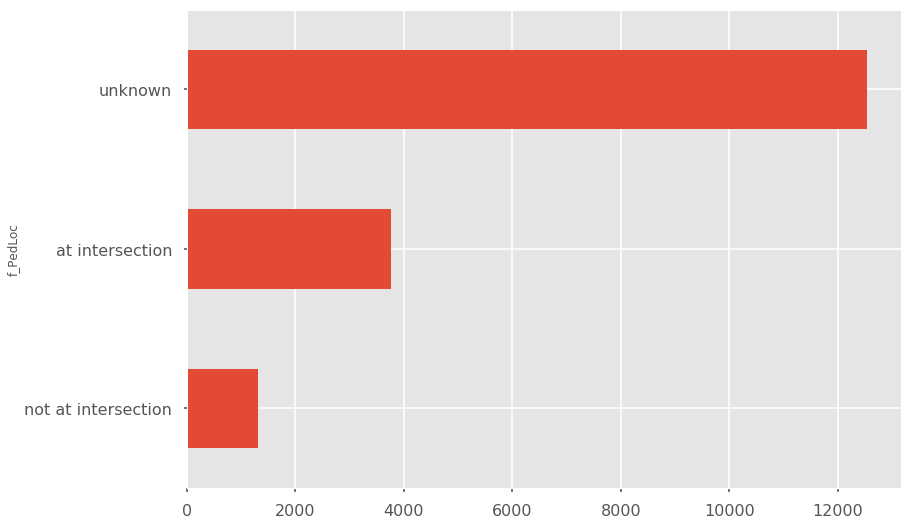

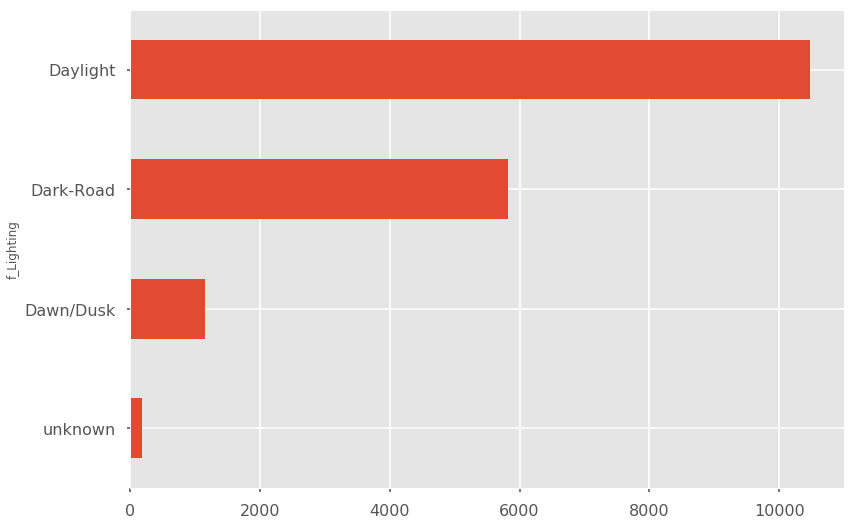

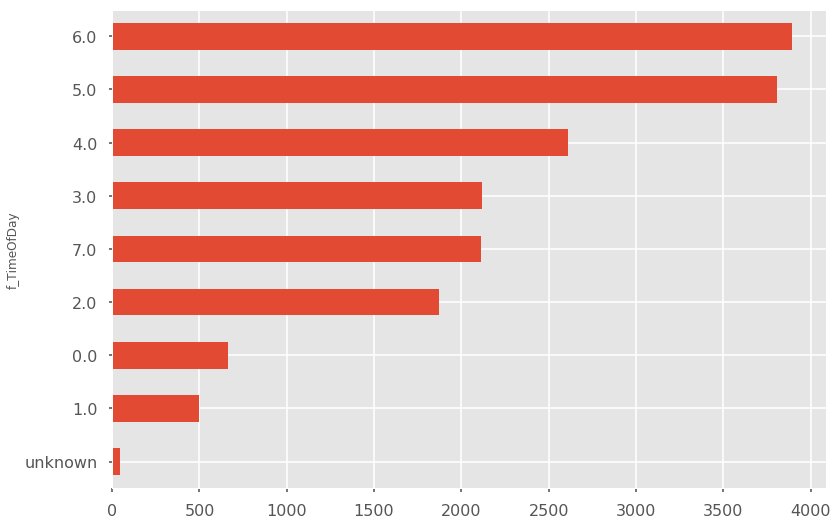

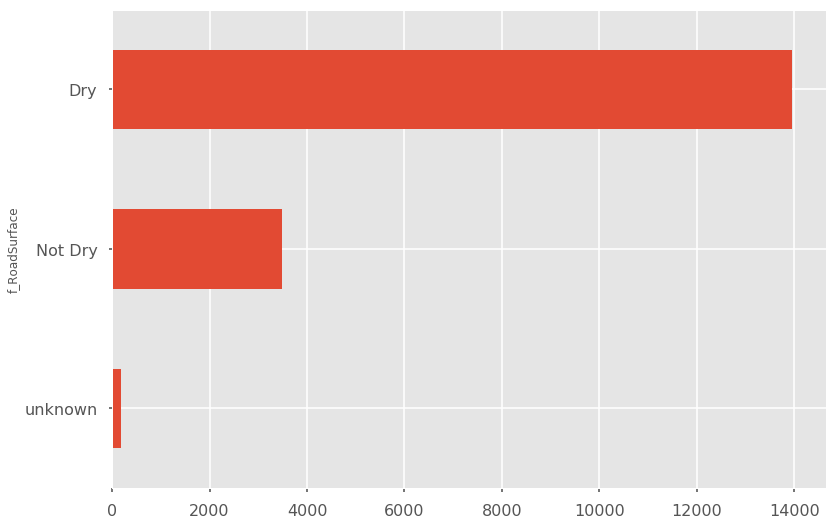

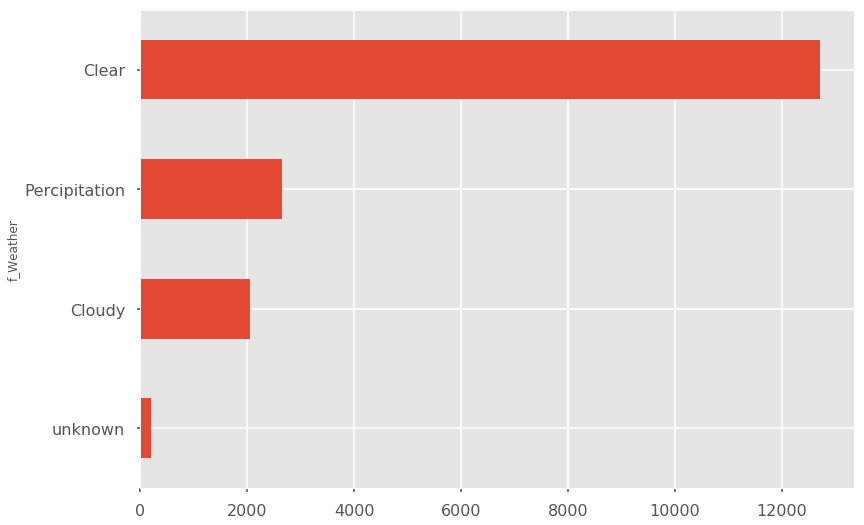

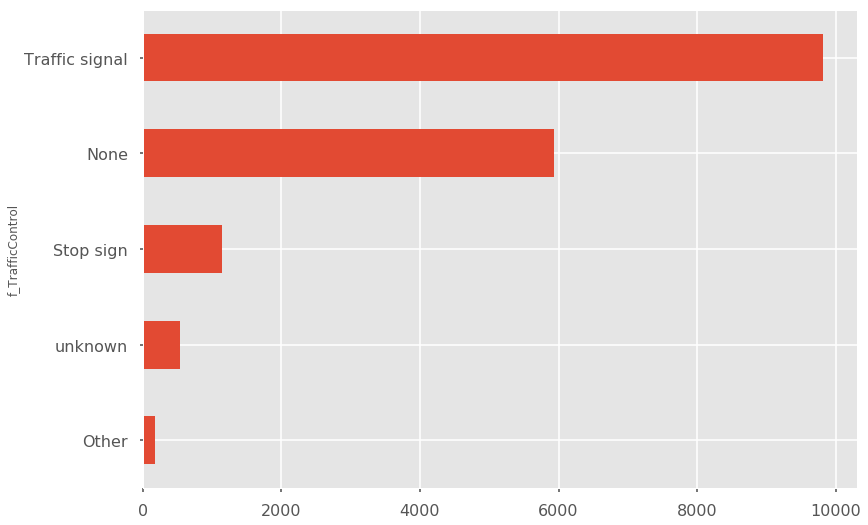

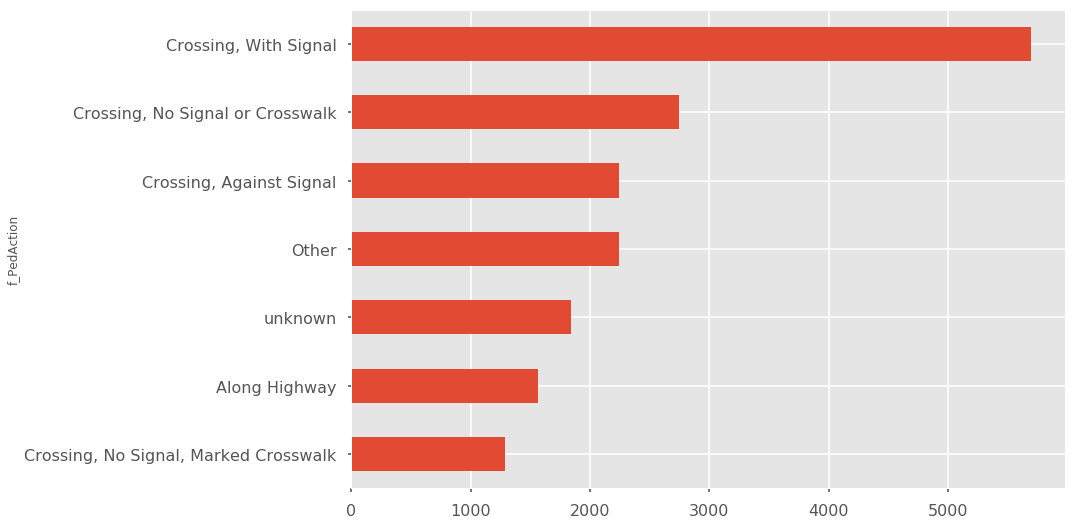

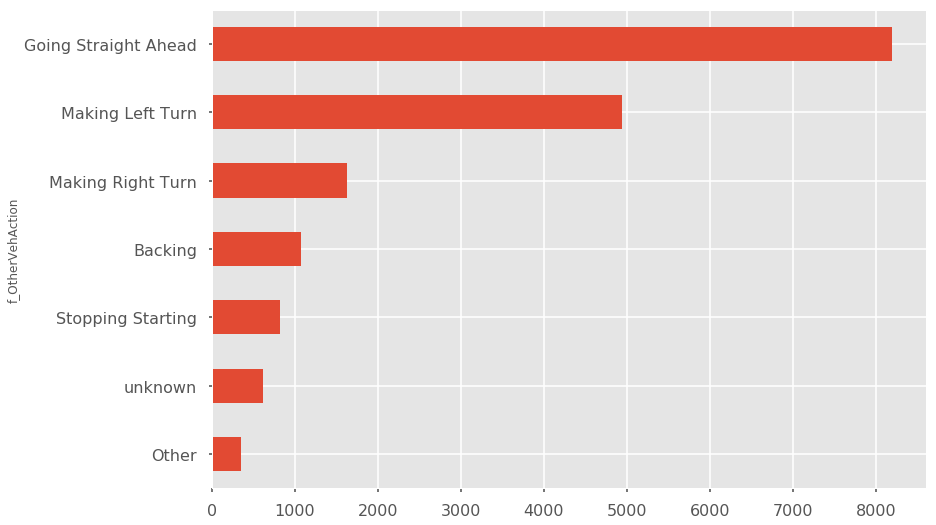

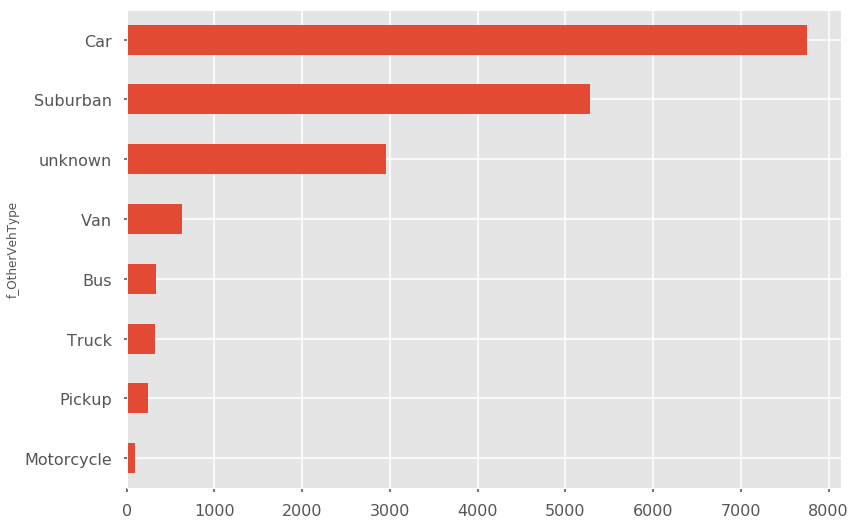

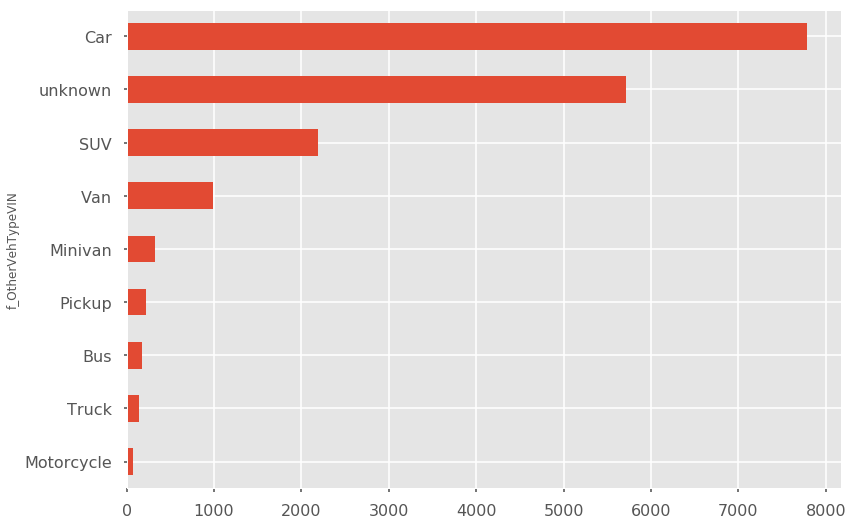

In [26]:
for i in ped.filter(like='f_').columns:
    ped.groupby(i).count()[['CI_ID']].sort_values('CI_ID').plot(kind='barh',
                                                                        legend=False)